# Hypothesis Testing with Insurance Data (Core)

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


- For each question, make sure to:
    - State your Null Hypothesis and Alternative Hypothesis
    - Select the correct test according to the data type and number of samples
    - Test the assumptions of your selected test.
    - Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - Interpret your p-value and reject or fail to reject your null hypothesis
    - Show a supporting visualization that helps display the result

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

In [3]:
smoker_df = df.loc[df.smoker =='yes', ['smoker','charges']]
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [4]:
nonsmoker_df = df.loc[df.smoker =='no', ['smoker','charges']]
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


# State your Null Hypothesis and Alternative Hypothesis

- H0 Null Hypothesis
    - No significant difference in insurance costs exists between smokers and non-smokers.

- HA Alternate Hypothesis
    - There is a significant difference in insurance costs exists between smokers and non-smokers.

# Select the correct test according to the data type and number of samples

- Data Type:
    - Numeric
    
- Number of Samples:
    -  2 smoker and non smoker
    
- Test:
    - 2-Sample T-Test

# Test the assumptions of your selected test

In [5]:
smoker_group = smoker_df['charges']
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [6]:
nonsmoker_group = nonsmoker_df['charges']
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

- Need to remove the 24 outliers

In [7]:
len(nonsmoker_group)

1064

In [8]:
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
len(nonsmoker_group)

1040

# Test for Normality

In [10]:
result = stats.normaltest(nonsmoker_group)
result.pvalue

2.6945416315543976e-36

In [11]:
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

# Test for Equal Variances

In [12]:
result = stats.levene(smoker_group, nonsmoker_group)
print(result)
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
The groups do NOT have equal variance.


# Execute the selected test, or the alternative test

In [14]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

# Interpret your p-value and reject or fail to reject your null hypothesis

- The pvalue for the Welsh Test was <.05
- We reject the null hypothesis and support the alternative that there is a significant difference in insurance costs exists between smokers and non-smokers

# Supporting visualization that helps display the result

In [15]:
plot_df = pd.concat([smoker_df, nonsmoker_df])

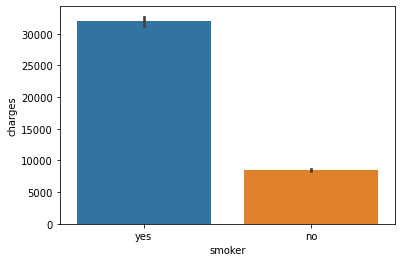

In [16]:
sns.barplot(data=plot_df, x='smoker', y='charges', ci=68)

# Q2. Are men more likely to smoke than women?

In [17]:
male_df = df.loc[df.sex =='male', ['sex','smoker']]
male_df

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
...,...,...
1324,male,no
1325,male,no
1327,male,no
1329,male,no


In [18]:
female_df = df.loc[df.sex =='female', ['sex','smoker']]
female_df

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no
...,...,...
1332,female,no
1334,female,no
1335,female,no
1336,female,no


# State your Null Hypothesis and Alternative Hypothesis

- H0 Null Hypothesis
    - No significant difference in the likelihood of being a smoker exists between men and women.

- HA Alternate Hypothesis
    - There is a significant difference in the likelihood of being a smoker exists between men and women.

# Select the correct test according to the data type and number of samples

- Data Type:
    - Numeric
    
- Number of Samples:
    -  2 male and female
    
- Test:
    - 2-Sample T-Test

# Test the assumptions of your selected test

In [19]:
male_group = male_df['smoker']
male_outliers = np.abs(stats.zscore(male_group)) > 3
male_outliers.sum()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [20]:
female_group = female_df['smoker']
female_outliers = np.abs(stats.zscore(female_group)) > 3
female_outliers.sum()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Test for Normality

# Test for Equal Variance

# Execute the selected test, or the alternative test

# Interpret your p-value and reject or fail to reject your null hypothesis

- The pvalue for the Welsh Test was .05
- 

# Supporting visualization that helps display the result

# Q3. Do different regions have different charges, on average?

# State your Null Hypothesis and Alternative Hypothesis

- H0 Null Hypothesis
    - No significant difference in charges exists between regions.

- HA Alternate Hypothesis
    - There is a significant difference in charges between regions.

# Select the correct test according to the data type and number of samples

- Data Type:
    - Numeric
    
- Number of Samples:
    -  more than 2 regions
    
- Test:
    - ANOVA or Turkey

# Test the assumptions of your selected test

# Test for Normality

# Test for Equal Variance

# Execute the selected test, or the alternative test

# Interpret your p-value and reject or fail to reject your null hypothesis

- The pvalue for the Test was .05
- 

# Supporting visualization that helps display the result